In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)
pd.set_option('Display.max_columns',None)

In [58]:
df=pd.read_csv('ABNB.csv')
df

,date,close_last,volume,open,high,low
0,08-19-2022,114.76,5288830,118.18,119.22,114.10
1,08-18-2022,121.27,3373946,121.50,122.20,120.28
2,08-17-2022,121.87,4336182,121.63,123.27,120.64
3,08-16-2022,124.18,4371514,124.23,125.42,122.62
4,08-15-2022,126.04,4884711,123.55,126.43,123.20
...,...,...,...,...,...,...
421,12-16-2020,137.99,20409550,125.83,142.00,124.91
422,12-15-2020,124.80,10914430,126.69,127.60,121.50
423,12-14-2020,130.00,16966090,135.00,135.30,125.16
424,12-11-2020,139.25,26980830,146.55,151.50,135.10


In [59]:
df['date']=pd.to_datetime(df['date'])
df=df.set_index(df['date'])
df.head()

,date,close_last,volume,open,high,low
date,,,,,,
2022-08-19,2022-08-19,114.76,5288830,118.18,119.22,114.10
2022-08-18,2022-08-18,121.27,3373946,121.50,122.20,120.28
2022-08-17,2022-08-17,121.87,4336182,121.63,123.27,120.64
2022-08-16,2022-08-16,124.18,4371514,124.23,125.42,122.62
2022-08-15,2022-08-15,126.04,4884711,123.55,126.43,123.20


In [60]:
df=df.sort_index(ascending=True)
df

,date,close_last,volume,open,high,low
date,,,,,,
2020-12-10,2020-12-10,144.71,70447540,146.00,165.00,141.25
2020-12-11,2020-12-11,139.25,26980830,146.55,151.50,135.10
2020-12-14,2020-12-14,130.00,16966090,135.00,135.30,125.16
2020-12-15,2020-12-15,124.80,10914430,126.69,127.60,121.50
2020-12-16,2020-12-16,137.99,20409550,125.83,142.00,124.91
...,...,...,...,...,...,...
2022-08-15,2022-08-15,126.04,4884711,123.55,126.43,123.20
2022-08-16,2022-08-16,124.18,4371514,124.23,125.42,122.62
2022-08-17,2022-08-17,121.87,4336182,121.63,123.27,120.64


In [61]:
input=['close_last',	'volume',	'open',	'high',	'low']
output=['close_last',	'volume',	'open',	'high',	'low']

In [62]:
n_features=len(input)

In [63]:
X=df[input].values
y=df[input].values

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
y_scaled=scaler.transform(y)

In [65]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled)

In [66]:
def sequences(X,y,ts):
  X_seq,y_seq=[],[]

  for i in range(len(X)-ts):
    X_seq.append(X[i:i+ts])
    y_seq.append(y[i+ts])
  return np.array(X_seq),np.array(y_seq)

In [67]:
ts=7
X_train_seq,y_train_seq=sequences(X_train,y_train,ts)
X_test_seq,y_test_seq=sequences(X_test,y_test,ts)

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(ts,n_features)))
model.add(LSTM(units=30,return_sequences=False))
model.add(Dense(n_features))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [70]:
history=model.fit(X_train_seq,y_train_seq,validation_data=(X_test_seq,y_test_seq),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.2061 - mae: 0.3859 - val_loss: 0.1004 - val_mae: 0.2500
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0838 - mae: 0.2300 - val_loss: 0.0438 - val_mae: 0.1588
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0522 - mae: 0.1686 - val_loss: 0.0405 - val_mae: 0.1494
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0423 - mae: 0.1557 - val_loss: 0.0402 - val_mae: 0.1526
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0419 - mae: 0.1548 - val_loss: 0.0384 - val_mae: 0.1463
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0438 - mae: 0.1541 - val_loss: 0.0388 - val_mae: 0.1462
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0377 - mae: 0.1437 - val_loss: 0.0382 - val_mae: 0.1464
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0357 - mae: 0.1423 - val_loss: 0.0382 - val_mae: 0.1457
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - lo

In [77]:
y_pred=model.predict(X_test_seq)
y_pred_invers=scaler.inverse_transform(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [78]:
y_test_invers=scaler.inverse_transform(y_test_seq)

In [85]:
data=pd.DataFrame({
    'Dates':df.index[-len(y_test_invers):],
    'Test':y_test_invers[:,0],
    'Prediksi':y_pred_invers[:,0]
})
data.head()
# data.to_excel('Prediksi.xlsx')

,Dates,Test,Prediksi
0,2022-03-29,116.15,154.848373
1,2022-03-30,140.40,154.618835
2,2022-03-31,149.77,154.682495
3,2022-04-01,92.88,154.649048
4,2022-04-04,207.04,153.369370


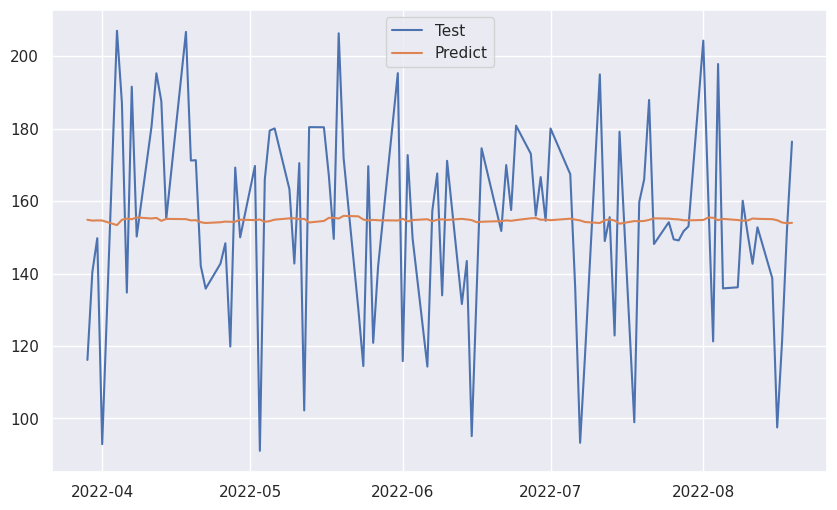

In [86]:
plt.figure(figsize=(10,6))
plt.plot(df.index[-len(y_test_invers):],y_test_invers[:,0],label='Test')
plt.plot(df.index[-len(y_pred_invers):],y_pred_invers[:,0],label='Predict')
plt.legend()
plt.grid(True)
plt.show()

In [102]:
def predict_features(model,last_sequences,n_days=30,scaler=None,start_date=None):
  feature_prediction=[]
  current_sequences=last_sequences[-7:].copy()

  for _ in range(n_days):
    current_sequences_reshaped=current_sequences.reshape((1,7,current_sequences.shape[1]))
    next_pred=model.predict(current_sequences_reshaped)
    feature_prediction.append(next_pred[0])
    current_sequences=np.roll(current_sequences,shift=-1,axis=0)
    current_sequences[-1]=next_pred

  feature_prediction=np.array(feature_prediction)
  if scaler is not None:
    feature_prediction=scaler.inverse_transform(feature_prediction)

  start_date = pd.to_datetime('2022-08-19')
  feature_dates=pd.date_range(start_date,periods=len(feature_prediction),freq='B')

  future_pred_df=pd.DataFrame({
      'Date':feature_dates,
      'Prediction':feature_prediction[:,0].flatten()
  })
  return future_pred_df

last_sequence=X_test_seq[-7]
future_preds=predict_features(model,last_sequence,n_days=30,scaler=scaler)

print("\nPrediksi harga untuk 30 hari ke depan:")
for idx, row in future_pred_df.iterrows():
    print(f"Tanggal: {row['Date'].strftime('%Y-%m-%d')}, Harga: {row['Predicted_Price']:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━

In [103]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.0 MB/s eta 0:00:00


In [104]:
from pmdarima import auto_arima

arima=auto_arima(df['close_last'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2691.411, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2692.966, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2694.579, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2694.610, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2691.030, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2694.644, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.760 seconds


In [105]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(df['close_last'],order=(0,1,0))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [109]:
train=df['close_last'].iloc[:-20]
test=df['close_last'].iloc[-20:]

In [110]:
start=len(train)
end=start+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

date
2022-07-25    103.97
2022-07-26    104.95
2022-07-27    101.91
2022-07-28    107.36
2022-07-29    108.84
2022-08-01    110.98
2022-08-02    111.20
2022-08-03    116.34
2022-08-04    115.02
2022-08-05    119.22
2022-08-08    117.11
2022-08-09    115.82
2022-08-10    114.44
2022-08-11    118.73
2022-08-12    121.50
2022-08-15    124.51
2022-08-16    126.04
2022-08-17    124.18
2022-08-18    121.87
2022-08-19    121.27
Name: predicted_mean, dtype: float64


<Axes: xlabel='date'>

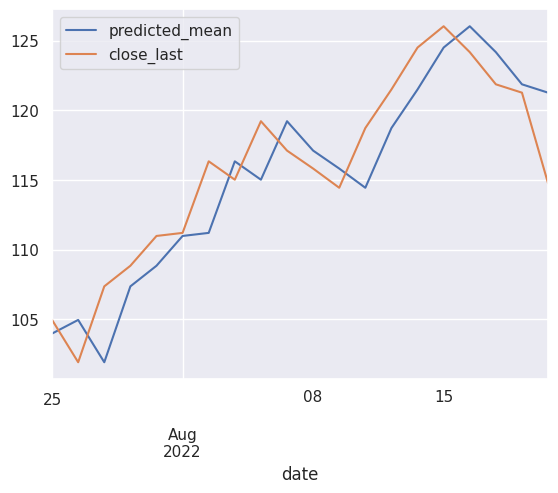

In [111]:
pred.plot(legend=True)
test.plot(legend=True)

In [114]:
index_future_dataset=pd.date_range('2022-08-19',periods=31)
pred2=model.predict(start=len(df),end=len(df)+31-1,typ='levels')
pred2.index=index_future_dataset
print(pred2)

2022-08-19    114.76
2022-08-20    114.76
2022-08-21    114.76
2022-08-22    114.76
2022-08-23    114.76
2022-08-24    114.76
2022-08-25    114.76
2022-08-26    114.76
2022-08-27    114.76
2022-08-28    114.76
2022-08-29    114.76
2022-08-30    114.76
2022-08-31    114.76
2022-09-01    114.76
2022-09-02    114.76
2022-09-03    114.76
2022-09-04    114.76
2022-09-05    114.76
2022-09-06    114.76
2022-09-07    114.76
2022-09-08    114.76
2022-09-09    114.76
2022-09-10    114.76
2022-09-11    114.76
2022-09-12    114.76
2022-09-13    114.76
2022-09-14    114.76
2022-09-15    114.76
2022-09-16    114.76
2022-09-17    114.76
2022-09-18    114.76
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
